In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


C:\Users\USER\AppData\Local\Temp\ipykernel_17252\2331074718.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv("Credit_card_dataset.csv")
df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [3]:
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [5]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [8]:
df['CREDIT_LIMIT'].median()

3000.0

In [9]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [10]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [11]:
df['CREDIT_LIMIT'].describe()

count     8950.000000
mean      4494.282473
std       3638.646702
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [13]:
selected_features = df[['PURCHASES', 'CREDIT_LIMIT']]
selected_features

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0
...,...,...
8945,291.12,1000.0
8946,300.00,1000.0
8947,144.40,1000.0
8948,0.00,500.0


In [14]:
selected_features.describe()

,PURCHASES,CREDIT_LIMIT
count,8950.000000,8950.000000
mean,1003.204834,4494.282473
std,2136.634782,3638.646702
min,0.000000,50.000000
25%,39.635000,1600.000000
50%,361.280000,3000.000000
75%,1110.130000,6500.000000
max,49039.570000,30000.000000


In [15]:
for col in selected_features.columns:
    Q1 = selected_features[col].quantile(0.25)
    Q3 = selected_features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    selected_features[col] = np.clip(selected_features[col], lower_bound, upper_bound)

C:\Users\USER\AppData\Local\Temp\ipykernel_17252\1347406584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[col] = np.clip(selected_features[col], lower_bound, upper_bound)
C:\Users\USER\AppData\Local\Temp\ipykernel_17252\1347406584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[col] = np.clip(selected_features[col], lower_bound, upper_bound)


In [16]:
selected_features.describe()

,PURCHASES,CREDIT_LIMIT
count,8950.000000,8950.000000
mean,737.149330,4419.137221
std,879.534788,3383.788645
min,0.000000,50.000000
25%,39.635000,1600.000000
50%,361.280000,3000.000000
75%,1110.130000,6500.000000
max,2715.872500,13850.000000


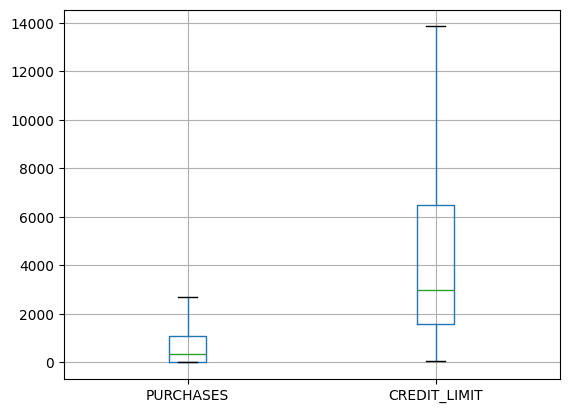

In [17]:
selected_features.boxplot()
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(selected_features)

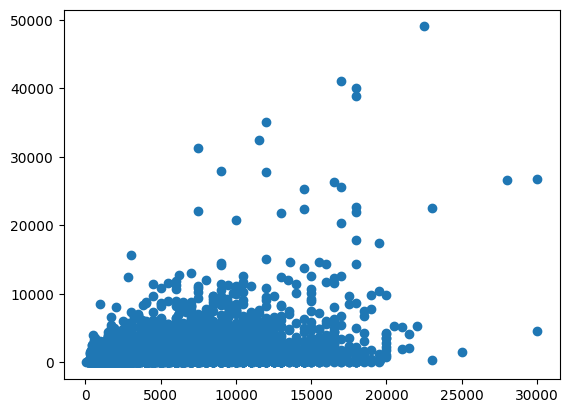

In [19]:
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'], )
plt.show()

In [21]:
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans_optimal = kmeans_optimal.fit_predict(selected_features)

In [22]:
labels_kmeans_optimal

array([3, 2, 2, ..., 3, 3, 3])

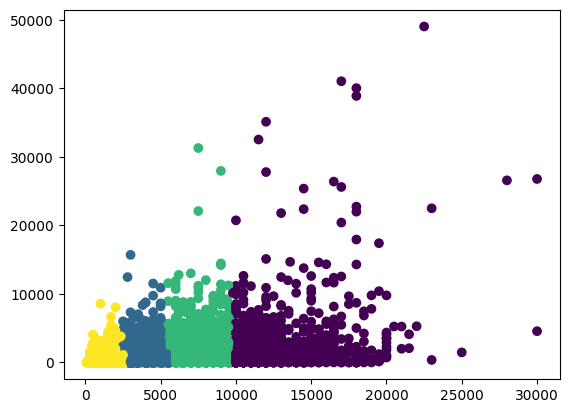

In [26]:
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'], c = labels_kmeans_optimal )
plt.show()